Examples illustrating usage of dautils on the credit approval data set
https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/

Acknowledgements

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science. 

Quinlan, "Simplifying decision trees", Int J Man-Machine Studies 27, Dec 1987, pp. 221-234.

Quinlan, "C4.5: Programs for Machine Learning", Morgan Kaufmann, Oct 1992

In [18]:
from dautils import sift, removeOutliers, missingStats, relMat, tladder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/
columnNames = ['A' + str(x) for x in range(1, 17)]
# missing values are denoated as '?' per dataset documentation
# see https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.names
df = pd.read_csv('crx.data', sep=',', header=-1, names=columnNames, na_values='?')

In [19]:
# See stats of missing/inf values in df
msr = missingStats(df)

Looking for missing values of input with 690 rows.
   column     type  inf      null
0     A14  float64  0.0  1.884058
1      A1   object  0.0  1.739130
2      A2  float64  0.0  1.739130
3      A7   object  0.0  1.304348
4      A6   object  0.0  1.304348
5      A4   object  0.0  0.869565
6      A5   object  0.0  0.869565
7     A15    int64  0.0  0.000000
8      A9   object  0.0  0.000000
9     A12   object  0.0  0.000000
10    A16   object  0.0  0.000000
11    A10   object  0.0  0.000000
12     A8  float64  0.0  0.000000
13    A11    int64  0.0  0.000000
14    A13   object  0.0  0.000000
15     A3  float64  0.0  0.000000


In [20]:
# Indicate numeric vs non-numeric columns
nonNumericCols = msr[msr['type'] == 'object']['column'].tolist()
numericCols = msr[msr['type'] != 'object']['column'].tolist()
# Fill in 'Missing' as missing value for all non-numeric columns
for nnc in nonNumericCols:
    df[nnc] = df[nnc].fillna('Missing')
# non-numeric columns should be filled
_ = missingStats(df)

Looking for missing values of input with 690 rows.
   column     type  inf      null
0     A14  float64  0.0  1.884058
1      A2  float64  0.0  1.739130
2     A15    int64  0.0  0.000000
3      A4   object  0.0  0.000000
4      A5   object  0.0  0.000000
5      A9   object  0.0  0.000000
6     A12   object  0.0  0.000000
7     A16   object  0.0  0.000000
8      A7   object  0.0  0.000000
9      A1   object  0.0  0.000000
10    A10   object  0.0  0.000000
11     A6   object  0.0  0.000000
12     A8  float64  0.0  0.000000
13    A11    int64  0.0  0.000000
14    A13   object  0.0  0.000000
15     A3  float64  0.0  0.000000


count    678.000000
mean      31.568171
std       11.957862
min       13.750000
1%        16.000000
25%       22.602500
50%       28.460000
75%       38.230000
99%       68.785000
max       80.250000
Name: A2, dtype: float64


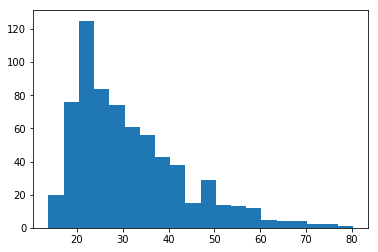

In [21]:
# What does A2 look like?
feature = 'A2'
print(df[feature].describe([0.01, 0.25, 0.5, 0.75, 0.99]))
plt.hist(df[feature].dropna(), 20);
rawValues = df[feature].dropna().values

In [22]:
# Assume we define "outliers" as values below and above the 0.5 and 99.5th percentiles
rawValuesClean, outliers, ioutlier = removeOutliers(rawValues, 0.01, top=True, bottom=True)
print(outliers)

# Assume we define "outliers" as values larger than the 99th percentile
rawValuesClean, outliers, ioutlier = removeOutliers(rawValues, 0.01, top=True, bottom=False)
print(outliers)

# Assume we define "outliers" as values smaller than the 1st percentile
rawValuesClean, outliers, ioutlier = removeOutliers(rawValues, 0.01, top=False, bottom=True)
print(outliers)

[15.83 15.17 74.83 13.75 80.25 76.75 73.42 15.83 15.75]
[71.58 69.17 69.5  74.83 80.25 76.75 73.42]
[15.83 15.92 16.   15.17 16.   13.75 15.83 15.75]


In [26]:
# Drop missing valued rows for now
dfDropped = df.dropna()

# Split data between EDA vs. testing
indexSplit = int(len(dfDropped)/2)
dfEDA = dfDropped.iloc[0:indexSplit]
dfHeldOut = dfDropped.iloc[indexSplit:]

In [33]:
# Set target to be A16 (categorical) and sift
siftResults = sift(dfEDA, targetCol='A16', targetType='class')
siftResults.sort_values('feature', ascending=True, inplace=True)
pd.set_option('display.max_rows', 30)
print(siftResults)

# Set target to be 
# Set target as A8 (continuous)
siftResultsCont = sift(dfEDA, targetCol='A8', targetType='cont')
siftResultsCont.sort_values('effectMag', ascending=False, inplace=True)
print(siftResultsCont)

   feature                                            test             p  \
51      A1  Binomial (p), effect p(y=+|x=Missing) / p(y=+)  2.959863e-01   
47      A1        Binomial (p), effect p(y=-|x=a) / p(y=-)  1.000000e+00   
48      A1  Binomial (p), effect p(y=-|x=Missing) / p(y=-)  2.959863e-01   
49      A1        Binomial (p), effect p(y=+|x=b) / p(y=+)  9.446322e-01   
50      A1        Binomial (p), effect p(y=+|x=a) / p(y=+)  1.000000e+00   
46      A1        Binomial (p), effect p(y=-|x=b) / p(y=-)  9.446322e-01   
45      A1                                         CramerV  5.398859e-01   
55     A10        Binomial (p), effect p(y=-|x=f) / p(y=-)  1.146345e-07   
58     A10        Binomial (p), effect p(y=+|x=t) / p(y=+)  5.569855e-08   
57     A10        Binomial (p), effect p(y=+|x=f) / p(y=+)  1.146345e-07   
56     A10        Binomial (p), effect p(y=-|x=t) / p(y=-)  5.569855e-08   
54     A10                                         CramerV  9.822515e-14   
91     A11  

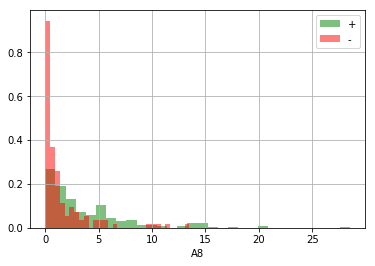

In [34]:
# Examine A8 to A16 relationship
feature = 'A8'
target = 'A16'
plt.hist(dfEDA[dfEDA[target] == '+'][feature], 30, alpha=0.5, color='g', label='+', density=True);
plt.hist(dfEDA[dfEDA[target] == '-'][feature], 30, alpha=0.5, color='r', label='-', density=True);
plt.legend();
plt.grid();
plt.xlabel('A8');

In [35]:
# Calculate relationship matrix across all dfDropped
relMat(dfEDA)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
A1,1.000000,0.798595,0.608902,0.043376,0.043376,0.306553,0.187732,0.581316,0.085771,0.054449,0.188595,0.047654,0.101882,0.810637,0.674479,0.060845
A2,0.798595,1.000000,0.145689,0.819369,0.819369,0.827323,0.917581,0.406511,0.839561,0.844729,0.215450,0.820631,0.883886,-0.063953,0.121827,0.836481
A3,0.608902,0.145689,1.000000,0.759369,0.759369,0.675844,0.754441,0.261062,0.719413,0.709059,0.269009,0.732012,0.827693,-0.336541,0.096818,0.712662
A4,0.043376,0.819369,0.759369,1.000000,1.000000,0.229336,0.397866,0.472835,0.181666,0.194466,0.220395,0.083810,0.508612,0.699446,0.654538,0.204622
A5,0.043376,0.819369,0.759369,1.000000,1.000000,0.229336,0.397866,0.472835,0.181666,0.194466,0.220395,0.083810,0.508612,0.699446,0.654538,0.204622
A6,0.306553,0.827323,0.675844,0.229336,0.229336,1.000000,0.574334,0.588142,0.320016,0.271380,0.237360,0.124127,0.272689,0.590534,0.660877,0.330675
A7,0.187732,0.917581,0.754441,0.397866,0.397866,0.574334,1.000000,0.637597,0.262845,0.185916,0.232005,0.124505,0.509232,0.520176,0.725865,0.242839
A8,0.581316,0.406511,0.261062,0.472835,0.472835,0.588142,0.637597,1.000000,0.564214,0.601837,0.348106,0.593697,0.419084,-0.153819,0.086555,0.609963
A9,0.085771,0.839561,0.719413,0.181666,0.181666,0.320016,0.262845,0.564214,0.992387,0.430589,0.479440,0.150835,0.124027,0.625677,0.697407,0.606582
A10,0.054449,0.844729,0.709059,0.194466,0.194466,0.271380,0.185916,0.601837,0.430589,0.993978,1.000000,0.041383,0.303748,0.625625,0.701713,0.407889


In [37]:
# Calculate relationship matrix across numerical columns of dfDropped
relMat(dfEDA, features=numericCols)

,A14,A2,A15,A8,A11,A3
A14,1.000000,-0.063953,-0.107827,-0.153819,-0.242993,-0.336541
A2,-0.063953,1.000000,0.121827,0.406511,0.215450,0.145689
A15,-0.107827,0.121827,1.000000,0.086555,0.388800,0.096818
A8,-0.153819,0.406511,0.086555,1.000000,0.348106,0.261062
A11,-0.242993,0.215450,0.388800,0.348106,1.000000,0.269009
A3,-0.336541,0.145689,0.096818,0.261062,0.269009,1.000000


count    333.000000
mean       5.647808
std        5.337943
min        0.000000
25%        1.415000
50%        4.000000
75%        9.500000
max       28.000000
Name: A3, dtype: float64
count    333.000000
mean       3.020060
std        3.966011
min        0.000000
25%        0.375000
50%        1.500000
75%        4.290000
max       28.500000
Name: A8, dtype: float64


C:\Users\Tom\Dropbox\Programming\dautils\dautils\dautils.py:210: UserWarning: Removing 2.1021021021021022% of data that is non-positive before analyzing.
  warnings.warn('Removing ' + str(percNP) + '% of data that is non-positive before analyzing.')


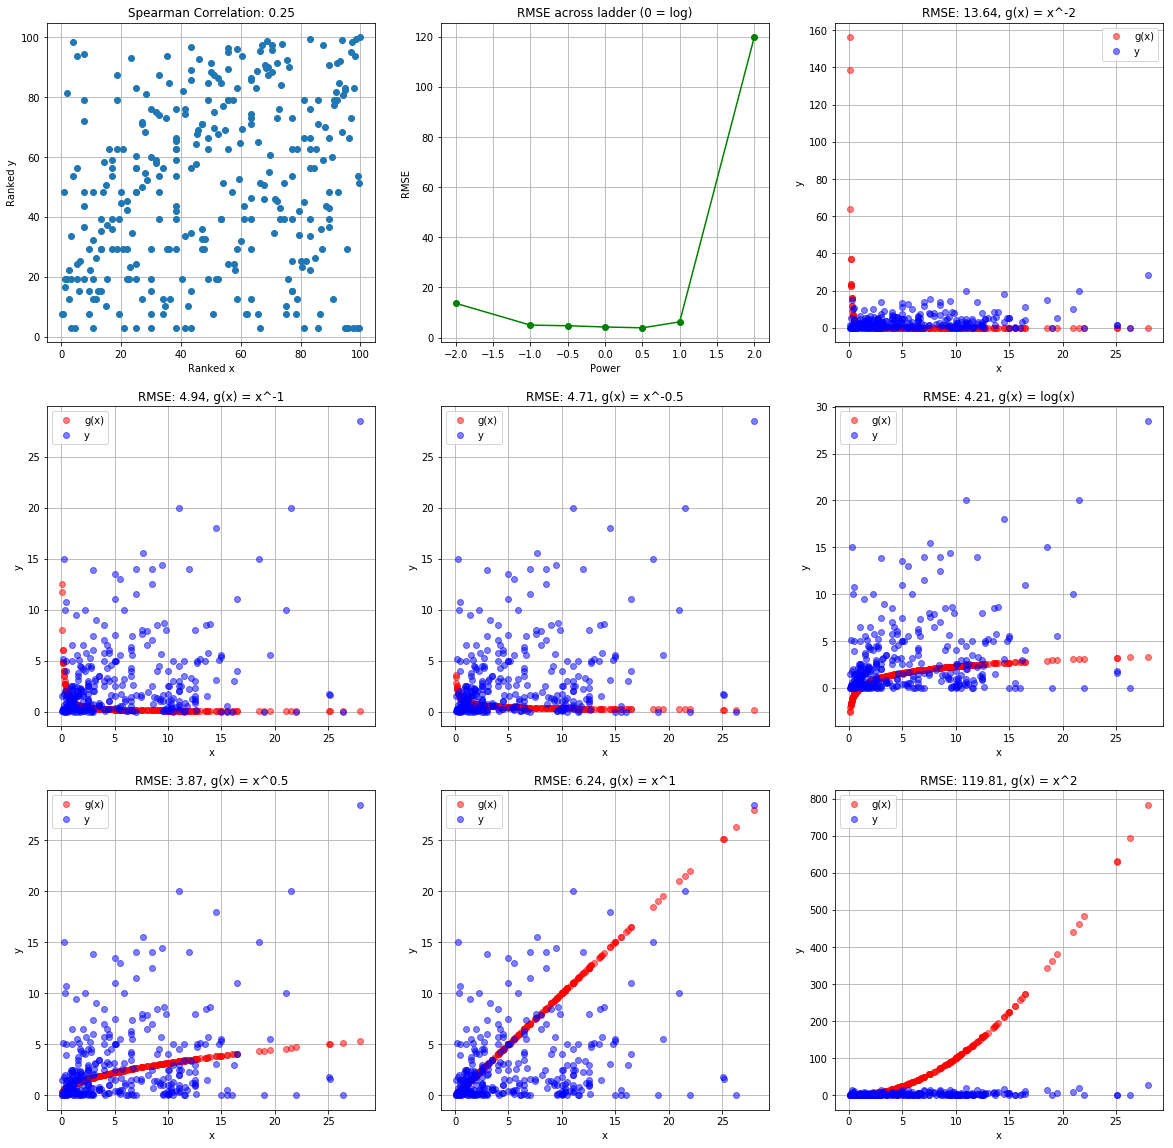

In [39]:
# Tukey's ladder on two continuous columns
print(dfEDA['A3'].describe())
print(dfEDA['A8'].describe())
y = dfEDA['A3'].values
x = dfEDA['A8'].values
tresults = tladder(y, x)